In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 284807
Columns: 31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#we dont have any null objects

In [ ]:
class_counts=df['Class'].value_counts()

In [ ]:
print("Not fraud (Class=0):", class_counts[0])
print("Fraud (Class=1):", class_counts[1])

Not fraud (Class=0): 284315
Fraud (Class=1): 492


In [ ]:
#the dataset is highly imbalanced, we will plot precision recall curve (which is best for highly unbalanced binary datasets)
# Area under PRC ..

In [ ]:
#no need for doing outlier elimination as the data is highly unbalanced and also the features are already preprocessed.
#(PCA had already been done).

In [ ]:
# we instead do visualize amount vs time for potential fraud and outliers.

<Axes: xlabel='Amount'>

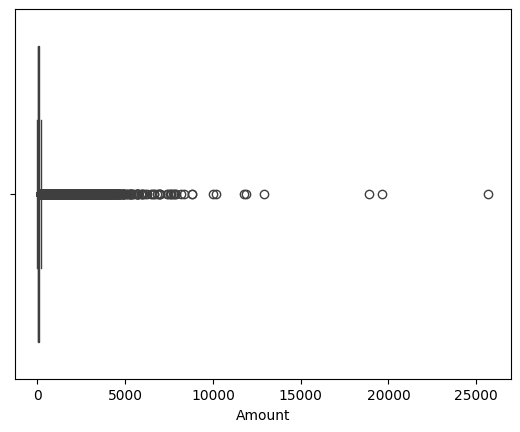

In [ ]:
sns.boxplot(x=df['Amount'])

In [ ]:
# we will compare fraud and non-fraud comparision w.r.t amount
fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0]

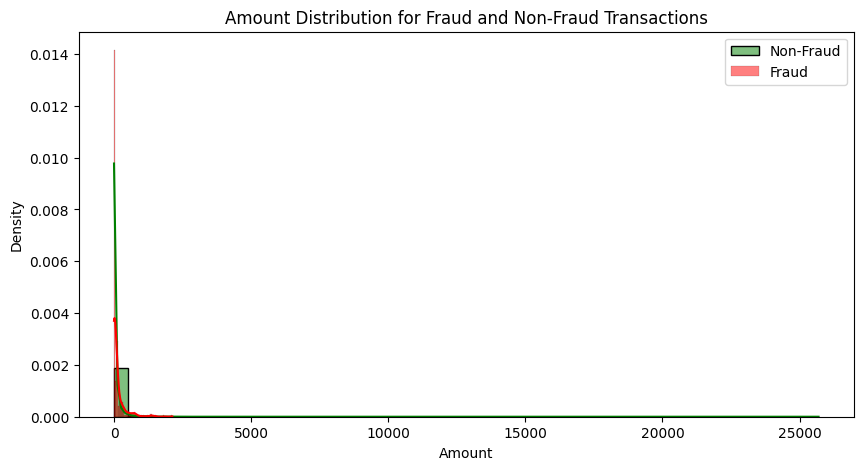

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(non_fraud['Amount'], bins=50, color='green', label='Non-Fraud', stat='density', kde=True)
sns.histplot(fraud['Amount'], bins=50, color='red', label='Fraud', stat='density', kde=True)
#stat=density is for viewing y axis as probability instead of raw counts.
plt.legend()
plt.title('Amount Distribution for Fraud and Non-Fraud Transactions')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

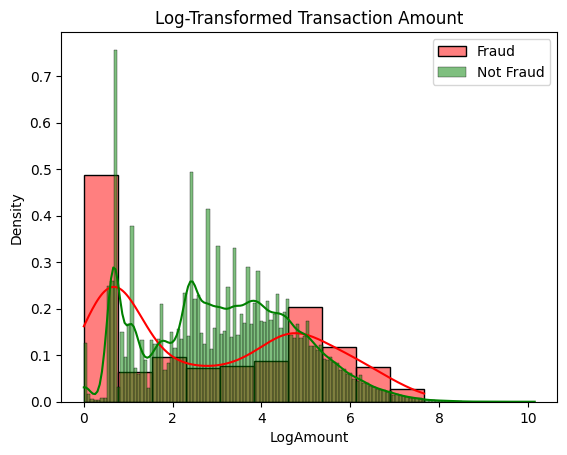

In [ ]:
df['LogAmount'] = np.log1p(df['Amount'])
# for better visuals..
sns.histplot(df[df['Class']==1]['LogAmount'], color='red', label='Fraud', stat='density', kde=True)
sns.histplot(df[df['Class']==0]['LogAmount'], color='green', label='Not Fraud', stat='density', kde=True)
plt.legend()
plt.title("Log-Transformed Transaction Amount")
plt.show()

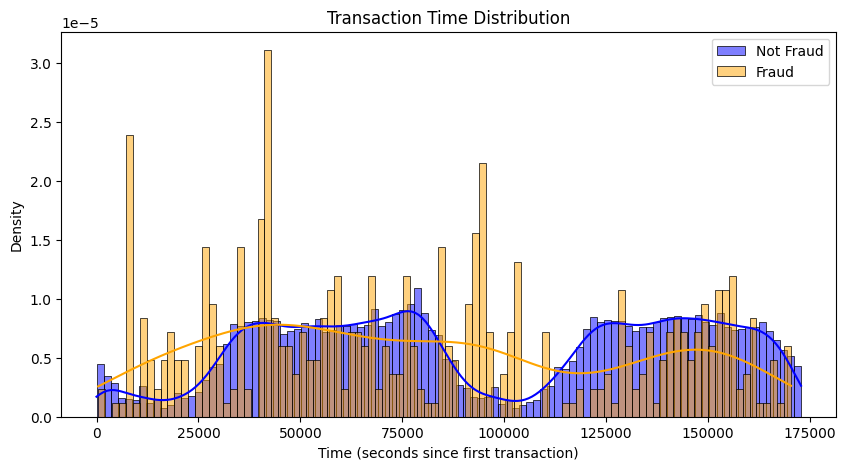

In [ ]:
# we will compare fraud and non-fraud comparision w.r.t time
plt.figure(figsize=(10,5))
sns.histplot(non_fraud['Time'], bins=100, color='blue', label='Not Fraud', stat='density', kde=True)
sns.histplot(fraud['Time'], bins=100, color='orange', label='Fraud', stat='density', kde=True)
plt.legend()
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Density")
plt.show()

In [ ]:
#we can clearly see where the density is high...

In [ ]:
# we will study some stats about fraud['amount'] and non-fraud['amount']

In [ ]:
print("Fraud Amount Stats:\n", fraud['Amount'].describe())
print("\nNon-Fraud Amount Stats:\n", non_fraud['Amount'].describe())

Fraud Amount Stats:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Non-Fraud Amount Stats:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [ ]:
#.............................................................Model Training.............................................................#

# We need a model which can handle highly imbalanced data good, capture non-linear patterns.
# we are going to XGBoost (Extreme Gradient Boosting), this is best for imbalanced datasets, fast and scalable.
# supports feature importance (model can rank features according to their importance) and probability thresholds.
# early stopping (if the model is not improving it stops even max iterations is not reached).

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

In [ ]:
scalar=StandardScaler()

In [ ]:
df[['Amount', 'Time']]=scalar.fit_transform(df[['Amount', 'Time']])
x=df.drop("Class", axis=1)
y=df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Ratio of non-fraud to fraud
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
print("scale_pos_weight =", scale_pos_weight)

scale_pos_weight = 577.2868020304569


In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1,
                    subsample=0.8, colsample_bytree=0.8, scale_pos_weight=scale_pos_weight,
                    early_stopping_rounds=10,use_label_encoder=False, eval_metric='aucpr', random_state=42)

In [ ]:
# subsample sets the fraction of the training data (rows) to be randomly sampled for training each tree.
# colsample_bytree sets are fraction of features to be randomly samples for training each tree.
# these steps prevent overfitting.

In [ ]:
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)
#verbose means to show the training progress and evaluation metrics during model training. (not necessary)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
print(xgb.__version__)

2.1.4


In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC :", average_precision_score(y_test, y_proba))

[[56200   664]
 [   15    83]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.85      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.92      0.60     56962
weighted avg       1.00      0.99      0.99     56962

ROC-AUC: 0.9771597897740978
PR-AUC : 0.7031180537283797


In [ ]:
# True Negatives (TN) = 56,200

# False Positives (FP) = 664

# False Negatives (FN) = 15

# True Positives (TP) = 83

# Recall = 83 / (83 + 15) == 0.85

# Precision = 83 / (83 + 664) == 0.11

# we have good recall ie , 85% frauds are caught
# but we also have less precision ie our model is accusing more people for fraud but one some of them are actually fraud ie (11%)

In [ ]:
# now we have to do treshold tuning to get how auprc varies w.r.t tresholds
# by default the treshold is 0.5
# model.predict_proba(X_test)=> this form a probabily matrix of size no of samples in x_test * 2
# [[p1, p2],[p1, p2],[p1, p2]....[]] where p1 is the probality for being non-fraud and p2 is probability of being fraud.
# we can see using model.classes_ .

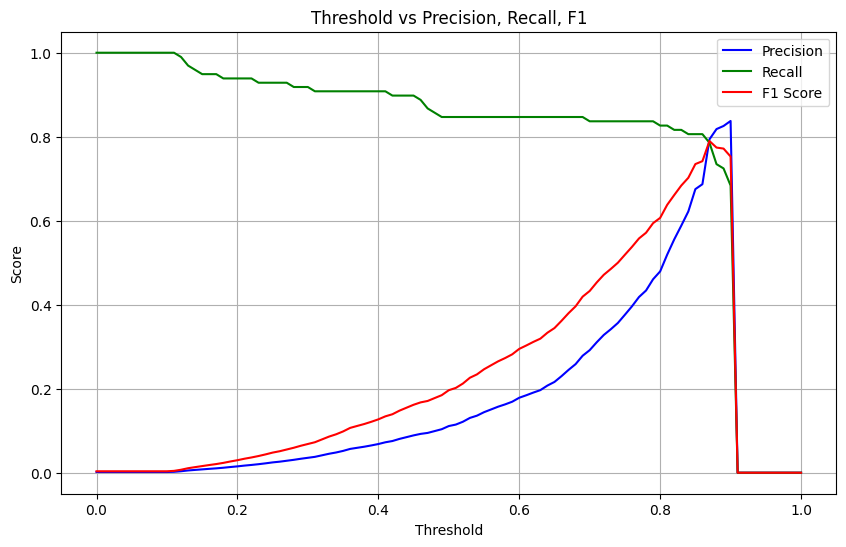

In [ ]:
thresholds = np.arange(0.0, 1.01, 0.01)
precision_scores = []
recall_scores = []
f1_scores = []

from sklearn.metrics import precision_score, recall_score, f1_score

for t in thresholds:
  y_pred_tresh=(y_proba>t).astype(int)
  precision_scores.append(precision_score(y_test, y_pred_tresh))
  recall_scores.append(recall_score(y_test, y_pred_tresh))
  f1_scores.append(f1_score(y_test, y_pred_tresh))

plt.figure(figsize=(10,6))
plt.plot(thresholds, precision_scores, label='Precision', color='blue')
plt.plot(thresholds, recall_scores, label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1 Score', color='red')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Precision, Recall, F1")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred_best = (y_proba > 0.88).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC :", average_precision_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.73      0.77        98

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9771597897740978
PR-AUC : 0.7031180537283797


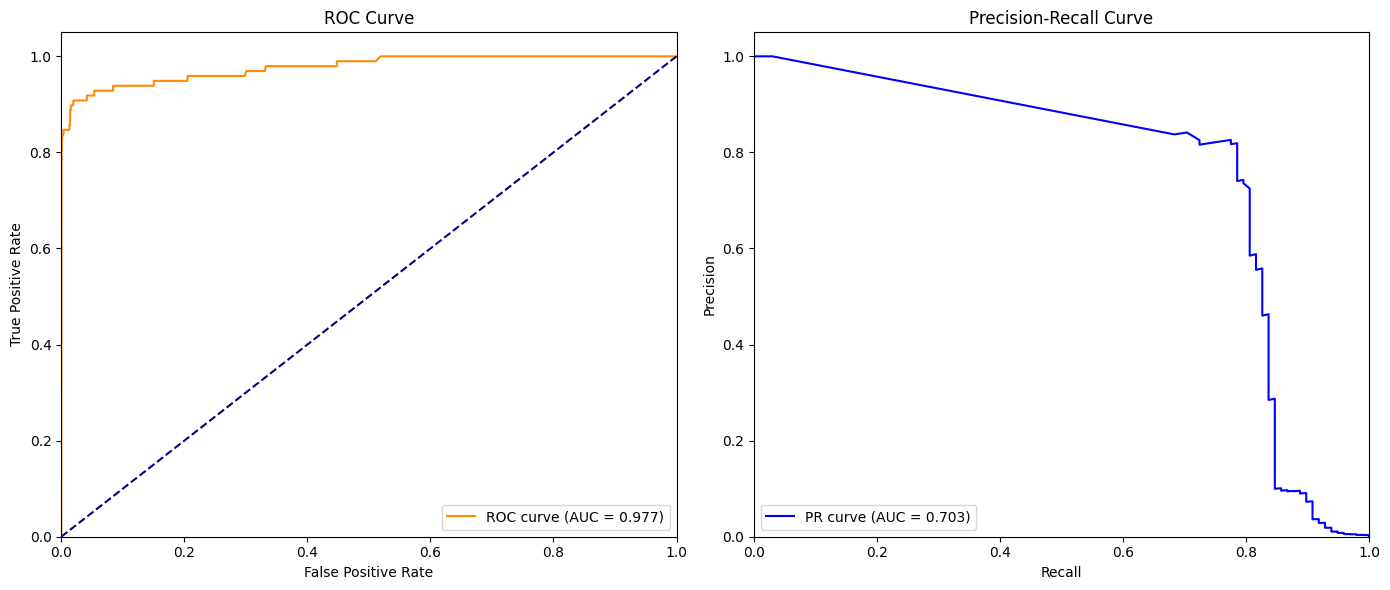

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ROC data
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
# (fpr=false positive rate, tpr=true positive rate)
# PRC data
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Plot side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curve
ax1.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.3f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', linestyle='--')  # baseline
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")

# PR Curve
ax2.plot(recall, precision, color='blue', label='PR curve (AUC = %0.3f)' % pr_auc)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")

plt.tight_layout()
plt.show()


In [ ]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

 95%|=================== | 53995/56962 [00:14<00:00]       

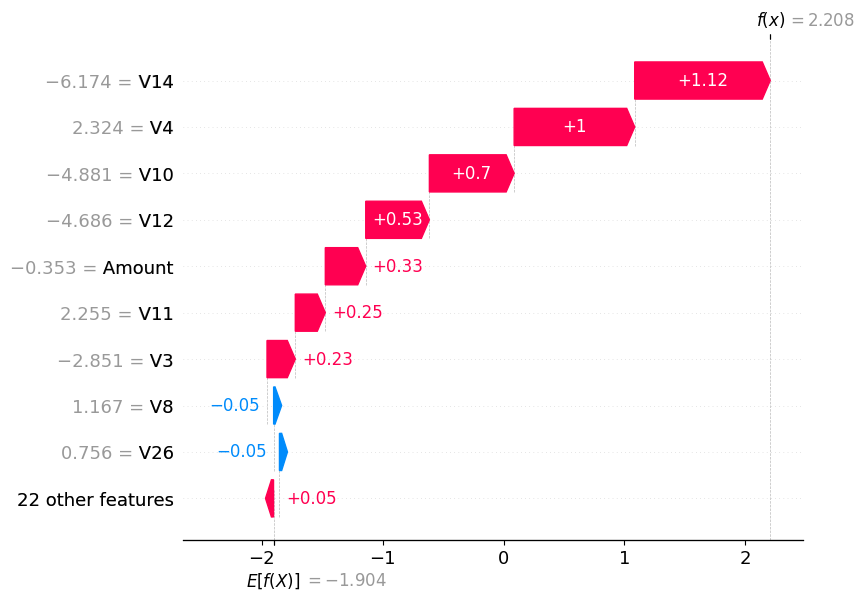

In [ ]:
fraud_pos = (y_test == 1).to_numpy().nonzero()[0][0]
shap.plots.waterfall(shap_values[fraud_pos])